# Clasificación por LDA en python  
Análisis Discriminante Lineal es un algoritmo de machine learning que nos permite la clasificación multi-clase de datos, permitiendo la predicción de campos polinomiales.  
En el presente trabajo demostraremos un proceso básico de este algoritmo en Python con SciKit Learn.  

## Análisis preliminar de Datos  
Utilizaremos un conjunto de datos reducido, con parámetros abstractos.  

|**Atributo**|**Tipo**|
|---|---|
|X|integer|
|Y|integer|
|Label (var objetivo)|polinomial|

## Procedimiento en Python  
Primero importamos librerías y cargamos el dataset.  

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

input_file = "sample.csv"
df = pd.read_csv(input_file, header=0)
df.sample(n=5)

,x,y,label
13,8.375419,0.520687,1
8,1.088070,1.150220,0
0,2.781084,2.550537,0
11,5.332441,2.088627,1
17,5.922597,1.881064,1


Podemos visualizarlos mejor con SKLearn

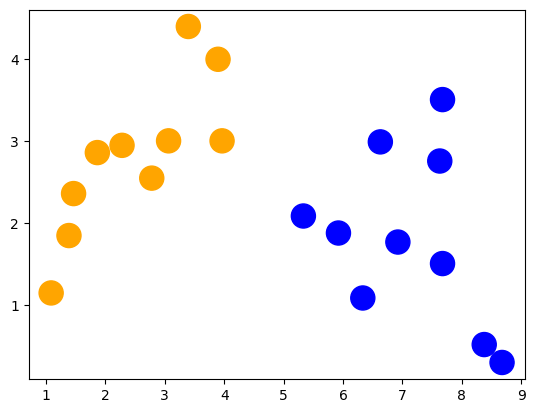

In [9]:
colors = ("orange", "blue")
plt.scatter(df['x'], df['y'], s=300, c=df['label'],
cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

Separamos las entradas de la salida y dividimos los datos para entrenar y testear.  

In [10]:
X = df[['x', 'y']].values
y = df['label'].values

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True)

Con los datos separados y definidos, entrenamos el modelo.

In [11]:
lda = LinearDiscriminantAnalysis()
lda = lda.fit(train_X, train_y)

Y pasamos a la predicción y vemos el desempeño.  

In [12]:
y_pred = lda.predict(test_X)
print("Predecidos")
print(y_pred)
print("Esperado")
print(test_y)

Predecidos
[1 0 1 0 1]
Esperado
[1 0 1 0 1]


Podemos traer una tabla de desempeño más clara y específica. Nos devuelve la precisión para predecir cada clase, promedios, predicciones correctas(recall), puntaje f1 y otros.

In [15]:
print(classification_report(test_y, y_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         2
           1      1.000     1.000     1.000         3

    accuracy                          1.000         5
   macro avg      1.000     1.000     1.000         5
weighted avg      1.000     1.000     1.000         5



También podemos producir la matriz de confusión

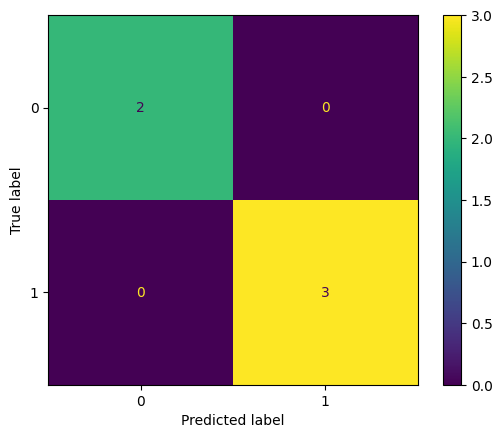

In [20]:
ConfusionMatrixDisplay.from_predictions(test_y, y_pred)

Podemos comparar con Regresión Logística, ya que solo hay 2 clases

Predicted vs Expected
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         2
           1      1.000     1.000     1.000         3

    accuracy                          1.000         5
   macro avg      1.000     1.000     1.000         5
weighted avg      1.000     1.000     1.000         5

---------------------------------------------------------------------------------


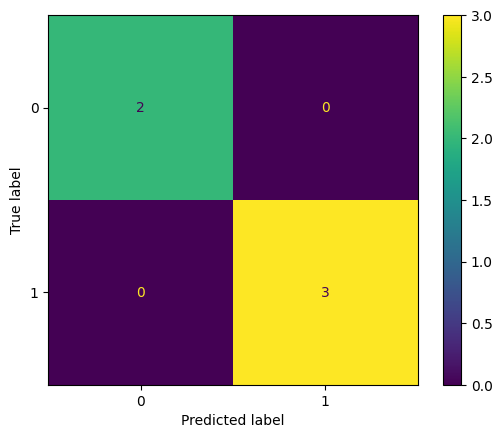

In [21]:
lr = LogisticRegression(penalty = 'l2', solver='liblinear', max_iter= 1000)
lr = lr.fit(train_X, train_y)

y_pred = lr.predict(test_X)
print("Predicted vs Expected")
print(classification_report(test_y,y_pred, digits=3))
print("---------------------------------------------------------------------------------")
print(ConfusionMatrixDisplay.from_predictions(test_y, y_pred))

# Conclusiones    
- La librería SKLearn es muy buena para la fácil definición de modelos  
- Nos permite fácilmente sacar reportes claros de desempeño  
- En un conjunto de datos pequeños, también se pueden sacar buenos resultados, mientras las separación de las clases sea suficiente.